<h1>                              Initial library importing and Formatting dataframe

In [603]:
#importing pandas & numpy for processing with dataframes and matplotlib for plotting results

import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6


In [604]:
# This is the csv file provided used as training. 
data = pd.read_csv('Core_train.csv')

#The initial results of csv file as dataframe
data.head()


,Time Stamp,GOR_CGA,GOR_LFA,METH_CGA,FCOL_LFA,POFR
0,0.41,-999.25,-999.25,-999.25,0.00,0.0000
1,639.41,-999.25,-999.25,-999.25,-999.25,0.4984
2,639.91,-999.25,-999.25,-999.25,-999.25,3.0632
3,640.41,-999.25,-999.25,-999.25,-999.25,3.9144
4,640.91,-999.25,-999.25,-999.25,-999.25,3.9653


<p><B><h2>The timstamps may be converted into days:hours:minutes:seconds. I had done that previously. But No need here. 
    


In [605]:
# rows and columns of dataset
data.shape


(35790, 6)

In [606]:
# Rounding up dataset values to 1 decimal value to prevent them from becoming infinite values. 

#data.round(1)

for i in range(data.shape[0]):
    for j in range(data.shape[1]):
        if data.iloc[i,j] < 0:
            data.iloc[i,j] = 0
        

In [607]:
data.head()

,Time Stamp,GOR_CGA,GOR_LFA,METH_CGA,FCOL_LFA,POFR
0,0.41,0.0,0.0,0.0,0.0,0.0000
1,639.41,0.0,0.0,0.0,0.0,0.4984
2,639.91,0.0,0.0,0.0,0.0,3.0632
3,640.41,0.0,0.0,0.0,0.0,3.9144
4,640.91,0.0,0.0,0.0,0.0,3.9653


In [608]:
data.shape

(35790, 6)

In [609]:
#Dropping the rows with null values in dataset 
data.dropna(how='any', inplace= True)


In [610]:

#data.drop(['Time Stamp'],axis=1,inplace=True)
np.any(np.isnan(data))

False

In [612]:
#We will normalise the data and make a new dataframe so we can use it later 
from sklearn import preprocessing

x = data[['GOR_CGA','GOR_LFA','METH_CGA','FCOL_LFA','POFR']].values #returns a numpy array

min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)


In [613]:
#Normalized dataframe 

new_data = pd.DataFrame(x_scaled)
new_data.head()

,0,1,2,3,4
0,0.0,0.0,0.0,0.0,0.000000
1,0.0,0.0,0.0,0.0,0.032429
2,0.0,0.0,0.0,0.0,0.199312
3,0.0,0.0,0.0,0.0,0.254696
4,0.0,0.0,0.0,0.0,0.258008


In [614]:
# New columns names to normalized dataframe
new_data.columns = ['GOR_CGA','GOR_LFA','METH_CGA','FCOL_LFA','POFR']
new_data.head()

,GOR_CGA,GOR_LFA,METH_CGA,FCOL_LFA,POFR
0,0.0,0.0,0.0,0.0,0.000000
1,0.0,0.0,0.0,0.0,0.032429
2,0.0,0.0,0.0,0.0,0.199312
3,0.0,0.0,0.0,0.0,0.254696
4,0.0,0.0,0.0,0.0,0.258008


In [428]:
# checking the datatypes of every feature
data.dtypes

Time Stamp    float64
GOR_CGA       float64
GOR_LFA       float64
METH_CGA      float64
FCOL_LFA      float64
POFR          float64
dtype: object

In [430]:
# Dataframe after replacing negative values with 0 
data.head()

,Time Stamp,GOR_CGA,GOR_LFA,METH_CGA,FCOL_LFA,POFR
0,0.41,0.0,0.0,0.0,0.0,0.0000
1,639.41,0.0,0.0,0.0,0.0,0.4984
2,639.91,0.0,0.0,0.0,0.0,3.0632
3,640.41,0.0,0.0,0.0,0.0,3.9144
4,640.91,0.0,0.0,0.0,0.0,3.9653


In [431]:
# Our data frame need an index which is unique to every row.
# Our timestamp column values are different for every row. so it is used as index of dataframe. 
data.index = data['Time Stamp']


In [434]:
# Bescause we use timestamp column as index, there is no need to keep that column in the dataframe so we drop it.

data.drop(['Time Stamp'],axis=1,inplace=True)

data.head()

,GOR_CGA,GOR_LFA,METH_CGA,FCOL_LFA,POFR
Time Stamp,,,,,
0.41,0.0,0.0,0.0,0.0,0.0000
639.41,0.0,0.0,0.0,0.0,0.4984
639.91,0.0,0.0,0.0,0.0,3.0632
640.41,0.0,0.0,0.0,0.0,3.9144
640.91,0.0,0.0,0.0,0.0,3.9653


In [33]:
#data[['GOR_LFA','GOR_CGA','METH_CGA']].plot()

<h1>                       Let's detect anomalies, trends & seasonal variations from our dataset generated 

In [435]:
# lets make sure the data types of our columns are good for mumber operations. 
data.dtypes

GOR_CGA     float64
GOR_LFA     float64
METH_CGA    float64
FCOL_LFA    float64
POFR        float64
dtype: object

<h1>Feature GOR_CGA anomaly Detection 

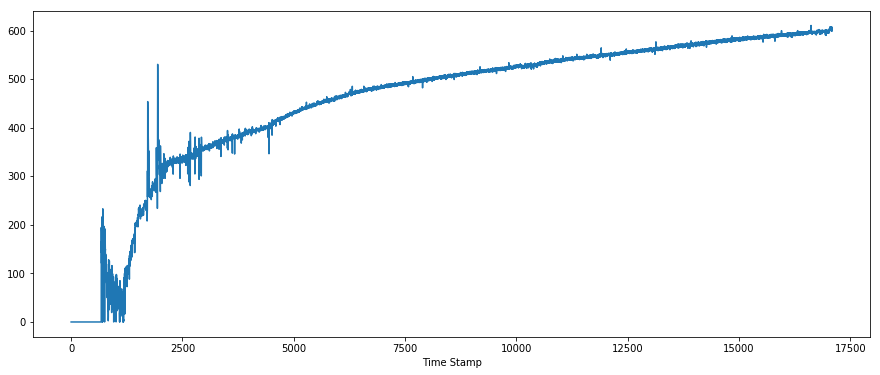

In [437]:
# Lets start with the 'GOR_CGA' feature to find anamolies. 
# we will start with the overall distribution of values in this feature. 
 
data['GOR_CGA'].plot()

<b><h3> Trend : It is consistantly upward and positive. Almost linear. 
    <P> Stationary : Mean & variance will not be consistent based on visual. <P> Seasonal : Intially, there's sudden surge of values & sudden drop and then there's almost linear trend. There might be a seasonal anomaly <p> Outliers : There are some extreme values around timestamp 2500 but we need to dig more. 
    
we will see more in depth for outliers using box plot and histogram of the same feature.

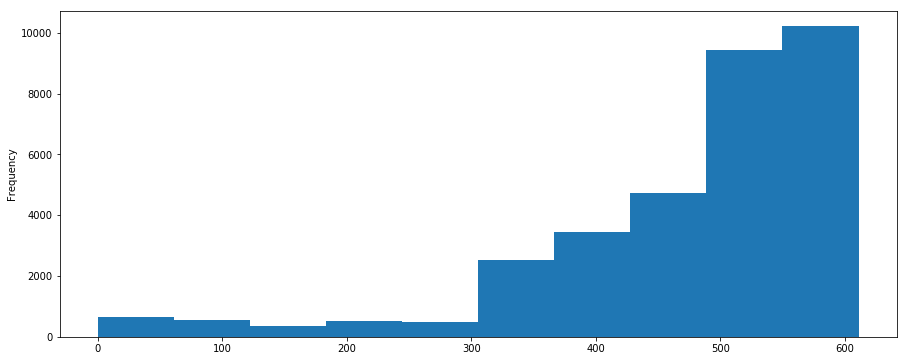

In [334]:
# Histogram based on 'GOR_CGA' feature
data['GOR_CGA'].sort_index().plot.hist()

<h2>Based on the histogram, This appears to be a skewed distribution. We may think, the extreme left value which are low in quantity may be outliers which are dragging our mean and standard deviation to lower scale.
The higher the values go, their overall frequency also increases. 
Let's Examine the boxplot for the same finding. 

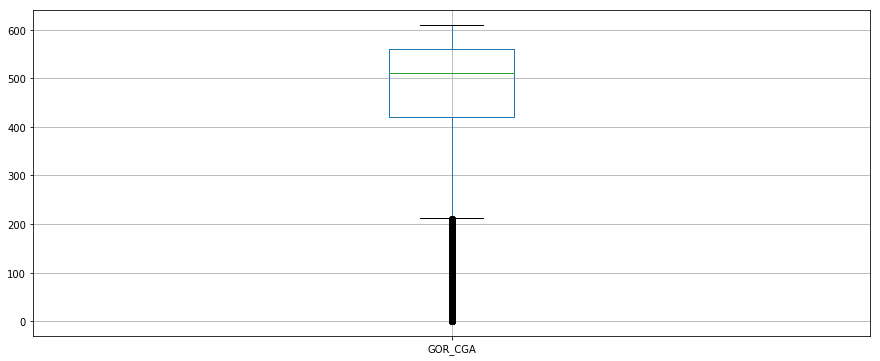

In [335]:
data.boxplot('GOR_CGA')

<h2> The box plot explains the range of outliers at the begining and higher in quantity. So our assumption we made in area plot of having seasonal anomaly in intial values is true. 
<p> Our assumption made in histogram, of having outliers in the begining of data is also correct. Also more than 60 % of values are of very high frequency which drives our mean & standard deviation higher 
<p>Let's see what our feature statistics tells us.  

In [477]:
# First we can see what are mean, median & standard deviation with extra summary for all our columns. 
perc =[.20, .40, .60, .80]
data['GOR_CGA'].describe(percentiles = perc)

count    32904.000000
mean       473.756999
std        123.430043
min          0.000000
20%        390.317080
40%        488.177600
50%        511.865000
60%        531.862320
80%        569.828500
max        610.993700
Name: GOR_CGA, dtype: float64

<h2><p>The range is almost 600 while the mean is around 470 which means there is more quantity higher values as described by histogram & boxplot than lower values.   
<p>We can safely say that mean & standard deviation are not consistent which means series is not stationary. 
<p> The difference between 20th percentile and 40th percentile is almost of 100 values. while the difference between 40th to 60th and 60th to 80th is less than 50 which means there seems to some seasonal variation in series. 
<p>  As the each percentile values gives increasing values, there is an positive upward trend.  
<p> Let's see if the mean and standard deviation changes consistently or not using rolling means and rolling standard deviation. 
    

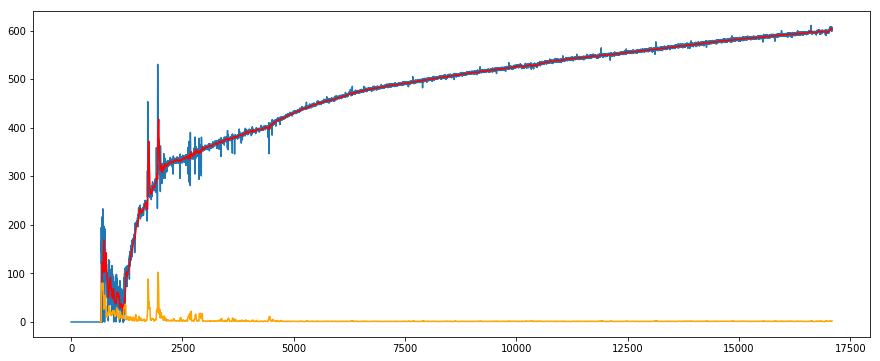

In [479]:
# Here we take mean & standard deviation of every 50 observations continuosly from 'GOR_CGA' feature and see if it is consistent with data. 

mean_x = data['GOR_CGA'].rolling(window=50).mean()
std_x = data['GOR_CGA'].rolling(50).std() 

plt.plot(data['GOR_CGA'])
plt.plot(mean_x, color = 'red')
plt.plot(std_x, color = 'orange')

<h2><p>The mean (red) is consistently increasing for every 50 observations following the series which definately means series is not stationary. 
   <P> The intial spikes and lows stands out as different from overall series which definately means its seasonal anomaly.
 <p>Let's confirm our result with KPSS (Kwiatkowski-Phillips-Schmidt-Shin) Test with null hypothesis as the process is trend stationary.If the test statistic is greater than the critical value, we reject the null hypothesis (series is not stationary). If the test statistic is less than the critical value, it fails to reject the null hypothesis (series is stationary)         

In [615]:
#define function for kpss test
from statsmodels.tsa.stattools import kpss
#define KPSS
def kpss_test(timeseries):
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression='c')
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print(kpss_output)


kpss_test(new_data['GOR_CGA'])

Results of KPSS Test:
Test Statistic           47.214361
p-value                   0.010000
Lags Used                52.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


C:\Users\Manoj Raghorte\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1276: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


<h2>The kpss result produces test statistics which is important for us.Because test statistics is greater than critical values, we can determine than series is non-stationary. 
<p> Also based on previous observations we can say that series GOR_CGA is non-stationary, have a positive upward trend, has seasonality in the begining and has outliers in large quantity in the begining also. 
 <p> Let's the relationship between this feature and independent variable 

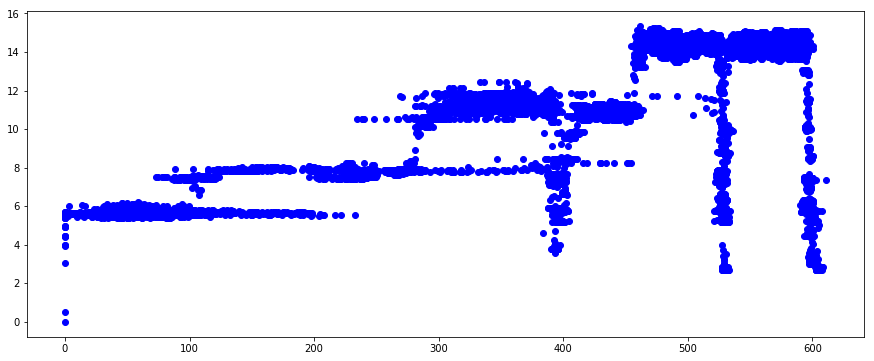

In [481]:
# lets see if there is any relationship between feature 'GOR_CGA' and independent variable 'POFR2'
plt.scatter(data['GOR_CGA'],data['POFR'], color='blue')

<h2> There seems to be a positive relationship between dependent & independent variable but not sure it it's linear or polynomial. Let's see both.

<p> We first make a dataframe from our test data to test our regression. 

In [483]:
# Testing dataset formatting
data_test = pd.read_csv('core.csv')
data_test.dropna() 
data_test.index = data_test['Time Stamp']
data_test.drop(['Time Stamp'],axis=1,inplace=True)
data_test.head()

,GOR_CGA,GOR_LFA,METH_CGA,FCOL_LFA,POFR2
Time Stamp,,,,,
18292.91,629.4653,516.1825,0.0098,0.0145,0.0000
18293.41,628.8616,516.1315,0.0097,0.0145,1.7496
18293.91,629.2354,516.5745,0.0097,0.0145,2.4481
18294.41,628.8007,517.2440,0.0096,0.0145,3.0072
18294.91,628.9004,517.0315,0.0097,0.0146,3.5374


<h2> Fitting linear model on train data and calculating Rsquared

0.3602834505416338

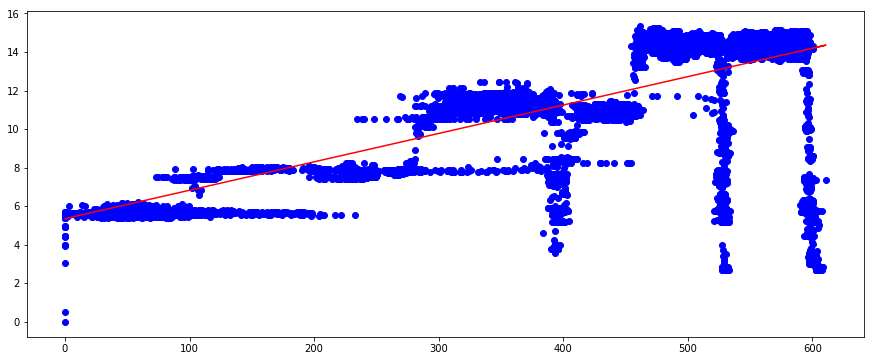

In [629]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
model_1 = LinearRegression()
m = model_1.fit(data[['GOR_CGA']],data[['POFR']])
plt.scatter(data['GOR_CGA'],data['POFR'],color='blue')
plt.plot(data['GOR_CGA'],model_1.predict(data[['GOR_CGA']]),color = 'red')
model_1.score(data[['GOR_CGA']],data[['POFR']])

<h2> Fitting linear model on test data and calculating R squared 

-1.6044963673253099

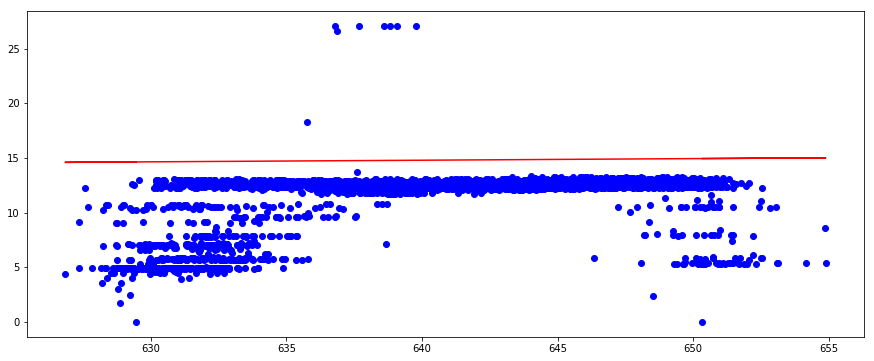

In [632]:
plt.scatter(data_test['GOR_CGA'],data_test['POFR2'],color='blue')
plt.plot(data_test['GOR_CGA'],model_1.predict(data_test[['GOR_CGA']]),color = 'red')
model_1.score(data_test[['GOR_CGA']],data_test[['POFR2']])

<h2>Fitting non-linear(polynomial) model on train data and calculating R squared and root mean squared error

2.1754356959126
0.4845508763964368


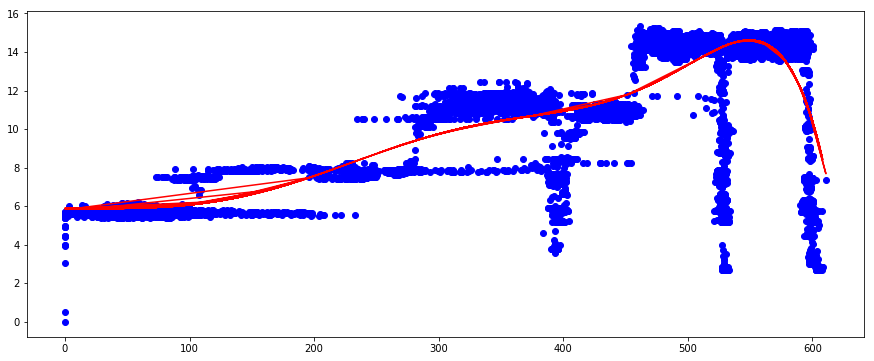

In [659]:
# Non-linear model for degree 8 
poly_reg = PolynomialFeatures(degree = 8)
X_poly = poly_reg.fit_transform(data[['GOR_CGA']])
lin_reg = LinearRegression()
lin_reg.fit(X_poly,data[['POFR']])
y_poly_pred = lin_reg.predict(X_poly)

plt.scatter(data['GOR_CGA'],data['POFR'],color ='blue')
plt.plot(data['GOR_CGA'], y_poly_pred, color='red')


rmse = np.sqrt(mean_squared_error(data['POFR'],y_poly_pred))
r2 = r2_score(data['POFR'],y_poly_pred)
print(rmse)
print(r2)

<h2>Fitting non-linear(polynomial) model on test data and calculating R squared and root mean squared error

18.568568990666513
-44.28121253971871


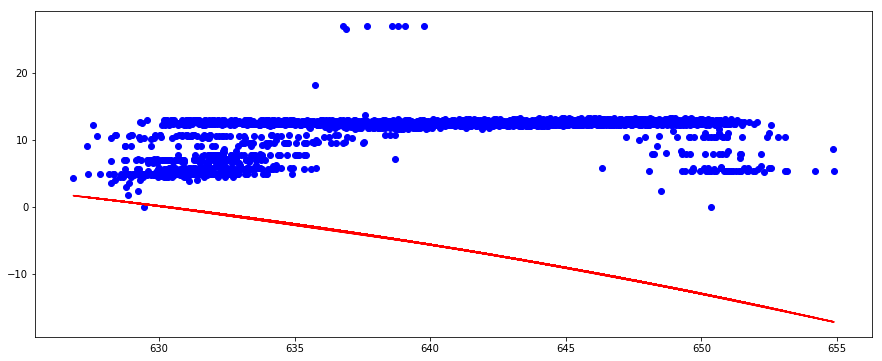

In [661]:
poly_reg = PolynomialFeatures(degree = 8)
y_poly_pred = lin_reg.predict(poly_reg.fit_transform(data_test[['GOR_CGA']]))

plt.scatter(data_test['GOR_CGA'],data_test['POFR2'],color ='blue')
plt.plot(data_test['GOR_CGA'], y_poly_pred, color='red')


rmse = np.sqrt(mean_squared_error(data_test['POFR2'],y_poly_pred))
r2 = r2_score(data_test['POFR2'],y_poly_pred)
print(rmse)
print(r2)

<h1>Feature GOR_LFA anomaly Detection 

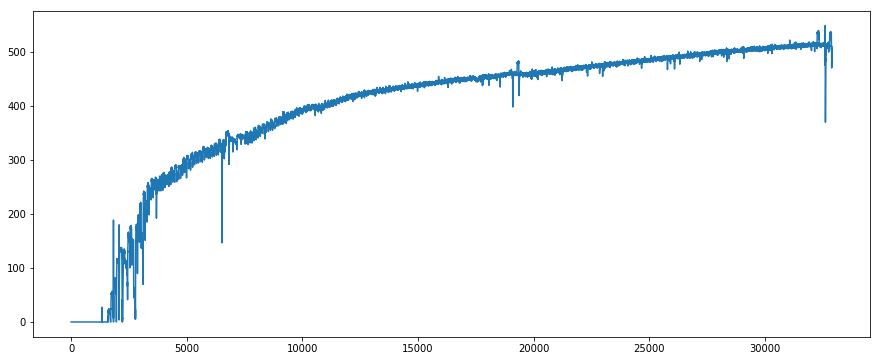

In [651]:
#Overall  values distribution of 'GOR_LFA' feature
data['GOR_LFA'].plot()

<b><h3> Trend : It is consistantly upward and positive. Almost linear. 
    <P> Stationary : Mean & variance will not be consistent based on plot. 
        <P> Seasonal : Intially the data points have no upward trend then they move exponentially and then almost linear trend. The initial data points may be due to seasoning anomaly. <p> Outliers : There seems to be some extreme values which appear not consistent with other overall points like the ones hanging down like stick. But we can not be sure that they are outliers.
    
we will see more in depth for outliers using box plot and histogram of the same feature.

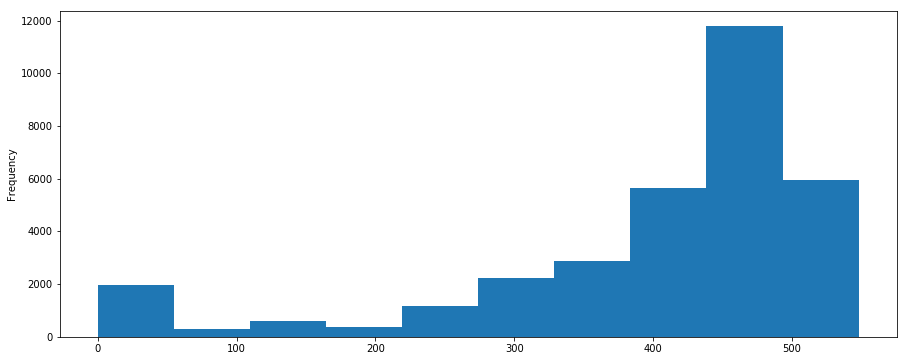

In [652]:
# Histogram based on 'GOR_LFA' feature
data['GOR_LFA'].sort_index().plot.hist()

<h2> It is perfectly left skewed distribution. Because the majority of data points are of high value & high frequency, mean and standard deviation should fall on the right side of the distribution. The begining data values are most likely outliers dragging the mean & standard deviation down.     

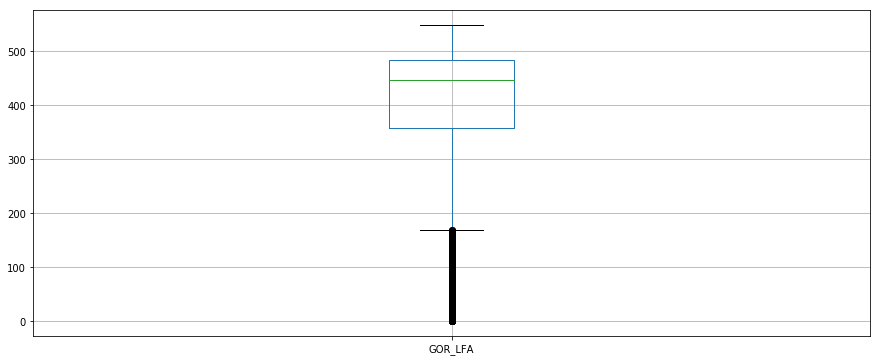

In [653]:
data.boxplot('GOR_LFA')


<h2>Our assumption that begining data are outliers is perfectly shown by the box plot.  Though the data points range from 200 to 600 the majority (60%) of points fall between 350 to 480. This appears to be non-stationary series with upward positive trend.  

In [654]:
# First we can see what are mean, median & standard deviation with extra summary for all our columns. 
perc =[.20, .40, .60, .80]
data['GOR_LFA'].describe(percentiles = perc)

count    32904.000000
mean       396.603620
std        131.085769
min          0.000000
20%        328.112100
40%        425.695780
50%        445.820650
60%        458.946500
80%        490.407800
max        548.128800
Name: GOR_LFA, dtype: float64

<h2>Let's check if the information we got conforms with the feature statistics. 
<p>The range is almost 550 between points, and mean is skewed in the right part of points as shown by histogram. 
 <p>Difference between 20th percentile and 40th is alomost 100 while between 40th to 60th is only 30 and 60th to 80th is around 30. This is clearly not a stationary series as denoted by area plot which has upward positive trend proven by high range values after 1st quartile and it has seasonal anomaly in the begining as the first 20 % of data has very high spread comapared to other data which is not likely. Lets see what rolling mean and standard deviation says  


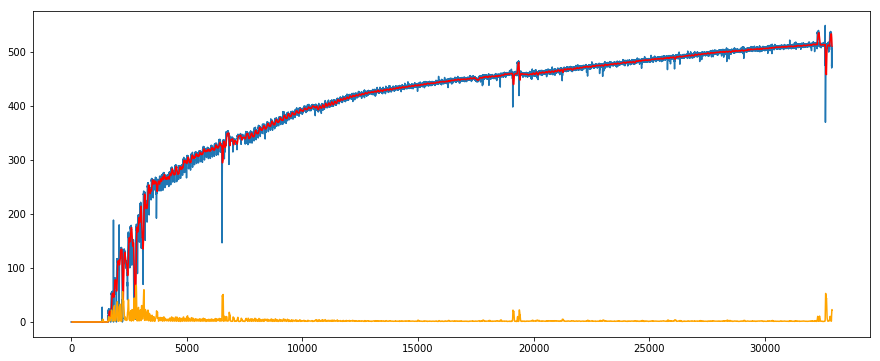

In [655]:
# Here we take mean & standard deviation of every 50 observations continuosly from 'GOR_LFA' feature and see if it is consistent with data. 

mean_x = data['GOR_LFA'].rolling(window=50).mean()
std_x = data['GOR_LFA'].rolling(50).std() 

plt.plot(data['GOR_LFA'])
plt.plot(mean_x, color = 'red')
plt.plot(std_x, color = 'orange')

<h2> The mean is consistently increasing with data points which says it's a non-stationary series. 
<p>The initial exponential behaviour of data points shown here and also by boxplot mean there is some seasonal anomaly happening. 
<p> though standard deviation is pretty constant, it has spikes in between which means there are outliers specially in begining which is also predicted by boxplot. 
   <p>Let us confirm our results using KPSS statistical test. 

In [656]:
#define function for kpss test
from statsmodels.tsa.stattools import kpss
#define KPSS
def kpss_test(timeseries):
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression='c')
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print(kpss_output)


kpss_test(new_data['GOR_LFA'])

Results of KPSS Test:
Test Statistic           44.254764
p-value                   0.010000
Lags Used                52.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


C:\Users\Manoj Raghorte\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1276: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


<h2> Our test statistics is way higher than the critical values which means series is highly non-stationary. 
<p> Based on previous observations, series has positive upward trend with seasonal anomaly and ouliers in the begining. 
<p>Let us see the relationship between independent and dependent variable. 

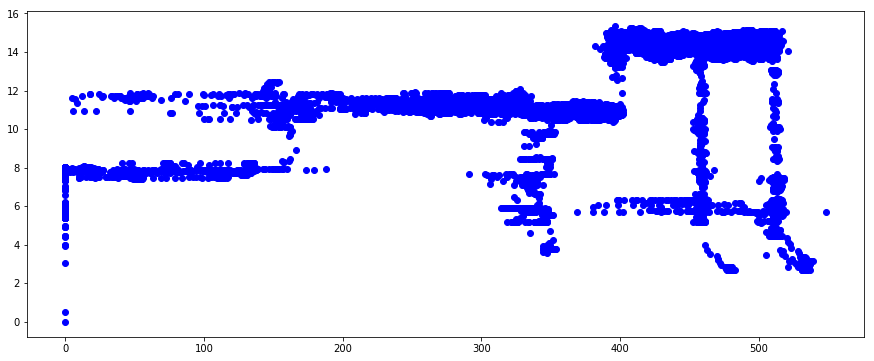

In [657]:
# lets see if there is any relationship between feature 'GOR_LFA' and independent variable 'POFR'
plt.scatter(data['GOR_LFA'],data['POFR'], color='blue')

<h2>This appears to somewhat linear trend but it is maybe polynomial. Let's plot the regression.   
<h2>Fitting non-linear(polynomial) model on train data and calculating R squared and root mean squared error

2.168720742152392
0.48772805615768766


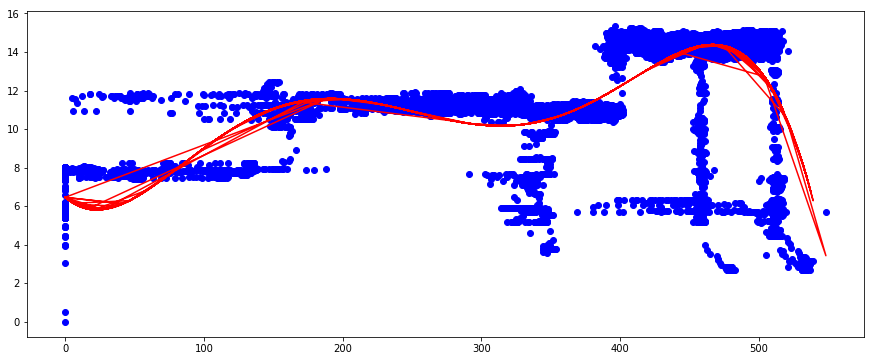

In [666]:
# Non-linear model for degree 5 
poly_reg = PolynomialFeatures(degree = 5)
X_poly = poly_reg.fit_transform(data[['GOR_LFA']])
lin_reg = LinearRegression()
lin_reg.fit(X_poly,data[['POFR']])
y_poly_pred = lin_reg.predict(X_poly)

plt.scatter(data['GOR_LFA'],data['POFR'],color ='blue')
plt.plot(data['GOR_LFA'], y_poly_pred, color='red')


rmse = np.sqrt(mean_squared_error(data['POFR'],y_poly_pred))
r2 = r2_score(data['POFR'],y_poly_pred)
print(rmse)
print(r2)

<h2> The polynomial regression of seems to be a good fit for our training data with relatively good R squared. Let's test this with test data. 
<p>Fitting non-linear(polynomial) model on test data and calculating R squared and root mean squared error

2.978211257969623
-0.16485583267952486


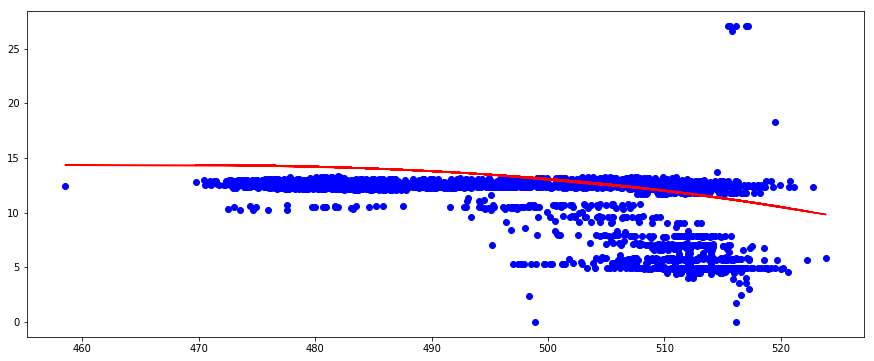

In [667]:


y_poly_pred = lin_reg.predict(poly_reg.fit_transform(data_test[['GOR_LFA']]))

plt.scatter(data_test['GOR_LFA'],data_test['POFR2'],color ='blue')
plt.plot(data_test['GOR_LFA'], y_poly_pred, color='red')


rmse = np.sqrt(mean_squared_error(data_test['POFR2'],y_poly_pred))
r2 = r2_score(data_test['POFR2'],y_poly_pred)
print(rmse)
print(r2)


<h1>Feature METH_CGA anomaly Detection 

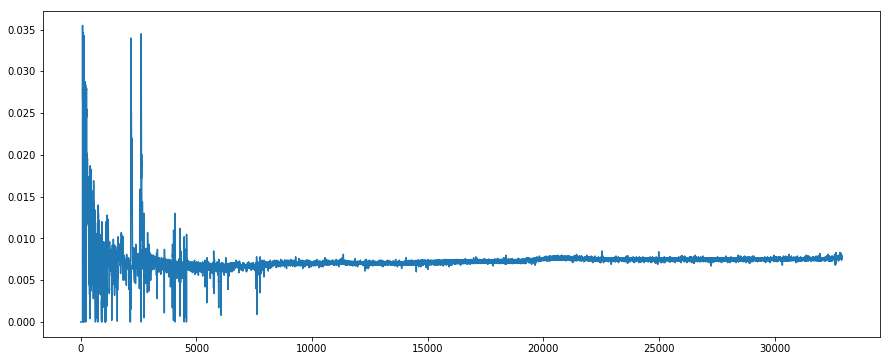

In [668]:
#Overall  values distribution of 'METH_CGA' feature
data['METH_CGA'].plot()

<h2>  Trend : It is consistantly linear after intial data points. 
    <P> Stationary : Mean & variance may not be consistent based intially. But after 5000, mean and variance may be consistent. <P> Seasonal : Intially, there's sudden surge of values & sudden drop and then there's almost linear trend. There might be a seasonal anomaly <p> Outliers : There are some extreme values around intial timestamps which may be ouliers but we need to dig more. 
    
we will see more in depth for outliers using box plot and histogram of the same feature

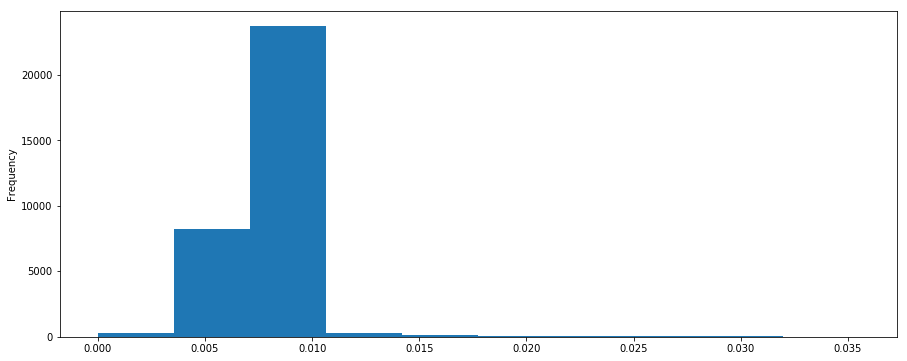

In [669]:
# Histogram based on 'METH_CGA' feature
data['METH_CGA'].sort_index().plot.hist()

<h2> It is almost stepwise increament happening on left side of distribution. The intial values holds the highest frequencies. The data points after timestamp 0.010 appears to be outliers which may have very little contribution towards higher mean and variance. Data points after 0.020 are most probably outliers as they very small in frequency but hold higher values seperating them from entire distribution.  
<p> The trend is skewed and cant be said with confidence but there may be definately some seasonal anomaly after 0.010 as it shows a sudden fall of frequency. 
  
lets see what the box plot says about 'METH_CGA' features outliers. 

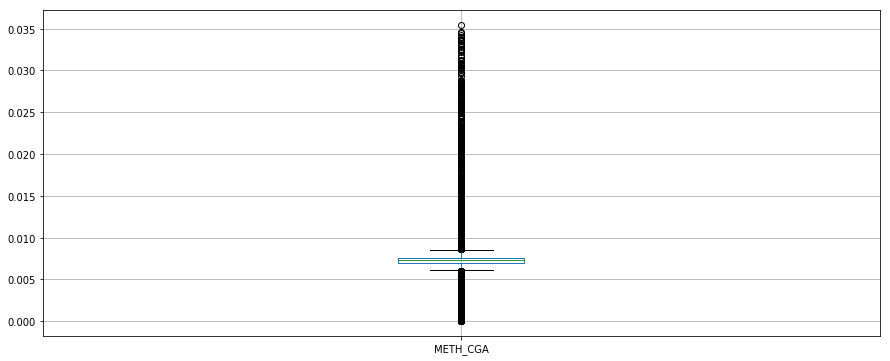

In [670]:
data.boxplot('METH_CGA')

<h2> We can confidently tell after 'METH_CGA' features boxplot has outliers are at the end values which are small quantity as we predicted in histogram. There also seems to be ouliers at begining which we didnt see in histogram. 
<p> More than 60% of data values of our distribution falls between 0.006 to 0.008 approximately but we can not predict that mean will fall between than range because of so big frequency of outliers.  
 <p> Let's see what our feature statistics tell us

In [671]:
# First we can see what are mean, median & standard deviation with extra summary for all our columns. 
perc =[.20, .40, .60, .80]
data['METH_CGA'].describe(percentiles = perc)

count    32904.000000
mean         0.007378
std          0.001778
min          0.000000
20%          0.007000
40%          0.007200
50%          0.007300
60%          0.007400
80%          0.007600
max          0.035500
Name: METH_CGA, dtype: float64

<h2>The statistics seems to be really small for all values. But one thing we can point out is almost on 80th percentile, almost middle of the data values fall which is shown by histogram also. The rest values have very high spread but low frequency that's why mean is ranging between the first quartile of values.   
<p> The distribution is definately skewed so our series can not be completely stationary but it can highly stationary. Also trend has been same for first half of distribution and different for other half. On the second half of distribution, there seems to be a seasonal anomaly. 
<p> lets see what our rolling means and standard deviation tells us.     

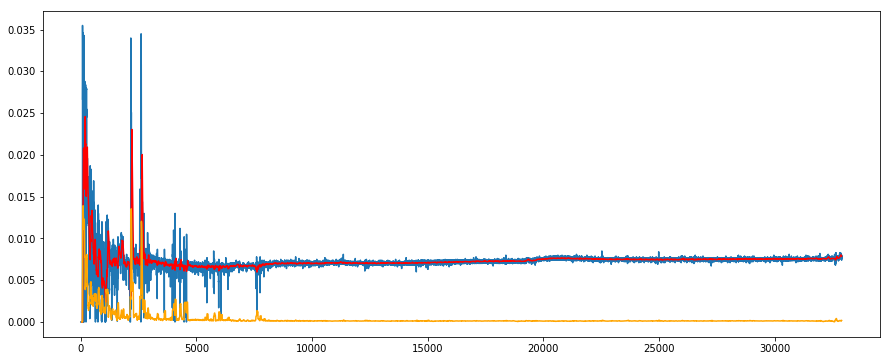

In [672]:
# Here we take mean & standard deviation of every 50 observations continuosly from 'METH_CGA' feature and see if it is consistent with data. 

mean_x = data['METH_CGA'].rolling(window=50).mean()
std_x = data['METH_CGA'].rolling(50).std() 

plt.plot(data['METH_CGA'])
plt.plot(mean_x, color = 'red')
plt.plot(std_x, color = 'orange')

<h2>The mean is consistent with data points, both almost linear after intial spikes and lows. Overall the means appears to be consistent and so as the standard deviation which means there is high probability that series is stationary. 
<p>There's also high probability of having seasonal anomaly in begining which no change in trend after timestamp 5000. 
<p> Outliers are mostly present on both sides of distribution.     
 Let's confirm our result with KPSS test    

In [673]:
#define function for kpss test
from statsmodels.tsa.stattools import kpss
#define KPSS
def kpss_test(timeseries):
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression='c')
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print(kpss_output)


kpss_test(new_data['METH_CGA'])

Results of KPSS Test:
Test Statistic            1.009173
p-value                   0.010000
Lags Used                52.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


C:\Users\Manoj Raghorte\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1276: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


<h2> Well as we predicted series is not completely stationary but the test statistics and critical values are not very varied which means it is near the stationarity with no trend , have anomalies in begining and outliers at both end. 
Let's the relationship between this feature and independent variable

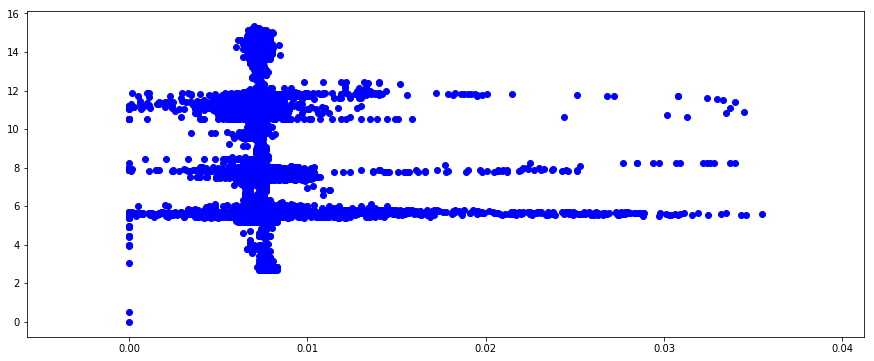

In [674]:
# lets see if there is any relationship between feature 'METH_CGA' and independent variable 'POFR'
plt.scatter(data['METH_CGA'],data['POFR'], color='blue')

<h2>The relationship is a combination of both linear and upward trend. This would have purely vertical linear relationship if there were no outliers which fall on right side. We will try to fit a linear model on this relationship. 
<p>Fitting linear model on train data and calculating Rsquared


0.0066297849152398

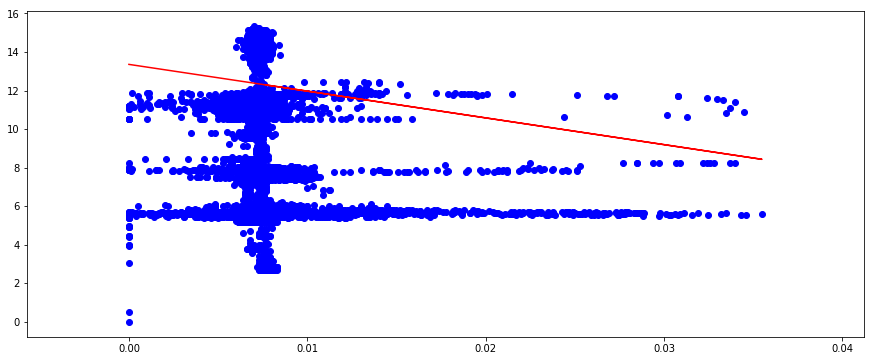

In [675]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
model_1 = LinearRegression()
m = model_1.fit(data[['METH_CGA']],data[['POFR']])
plt.scatter(data['METH_CGA'],data['POFR'],color='blue')
plt.plot(data['METH_CGA'],model_1.predict(data[['METH_CGA']]),color = 'red')
model_1.score(data[['METH_CGA']],data[['POFR']])

<h2> This does not appear to be a good fit with so less R squared value. Lets try non-linear relationship. 
<p>Fitting non-linear(polynomial) model on train data and calculating R squared and root mean squared error

2.9633014912465643
0.043588071990495414


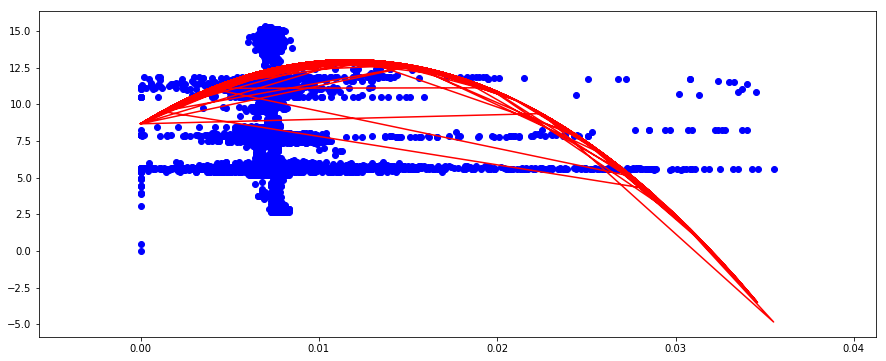

In [682]:
# Non-linear model for degree 2 
poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(data[['METH_CGA']])
lin_reg = LinearRegression()
lin_reg.fit(X_poly,data[['POFR']])
y_poly_pred = lin_reg.predict(X_poly)

plt.scatter(data['METH_CGA'],data['POFR'],color ='blue')
plt.plot(data['METH_CGA'], y_poly_pred, color='red')


rmse = np.sqrt(mean_squared_error(data['POFR'],y_poly_pred))
r2 = r2_score(data['POFR'],y_poly_pred)
print(rmse)
print(r2)

<h2>Fitting non-linear(polynomial) model on test data and calculating R squared and root mean squared error

3.233760669100333
-0.3733363834109338


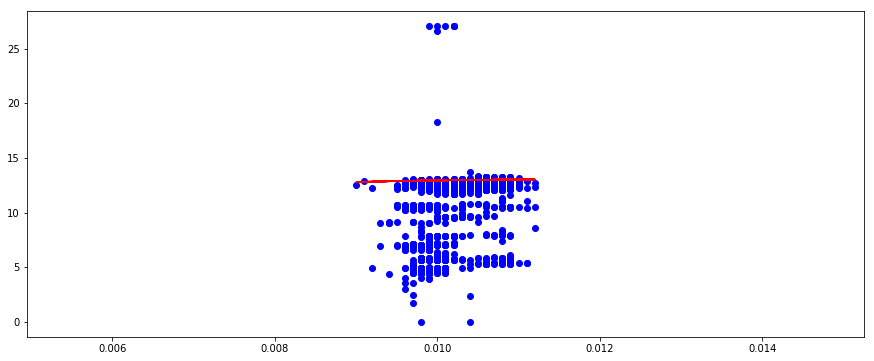

In [683]:
y_poly_pred = lin_reg.predict(poly_reg.fit_transform(data_test[['METH_CGA']]))

plt.scatter(data_test['METH_CGA'],data_test['POFR2'],color ='blue')
plt.plot(data_test['METH_CGA'], y_poly_pred, color='red')


rmse = np.sqrt(mean_squared_error(data_test['POFR2'],y_poly_pred))
r2 = r2_score(data_test['POFR2'],y_poly_pred)
print(rmse)
print(r2)


<h1>Feature FCOL_LFA anomaly Detection

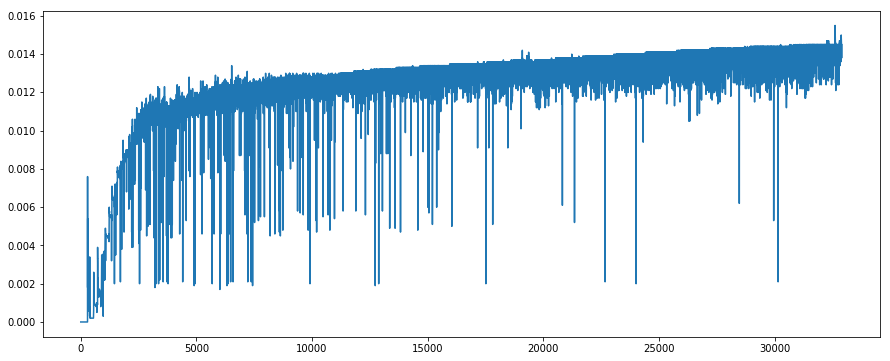

In [685]:
#Overall  values distribution of 'FCOL_LFA ' feature
data['FCOL_LFA'].plot()

<h2> Trend : It is consistantly linear and  slightly positive except the begining where it is almost exponential.  
    <P> Stationary : Mean & variance will not be consistent specially at the begining but after timestamp 5000, there seems to be that mean is consistent which means that series can be stationary. <P> Seasonal : Intially, there's sudden surge of values & few sudden drop and then there's almost linear trend. There might be a seasonal anomaly <p> Outliers : There are some extreme values around as there are lot of surges and falls but we need to dig more. 
    
we will see more in depth for outliers using box plot and histogram of the same feature.

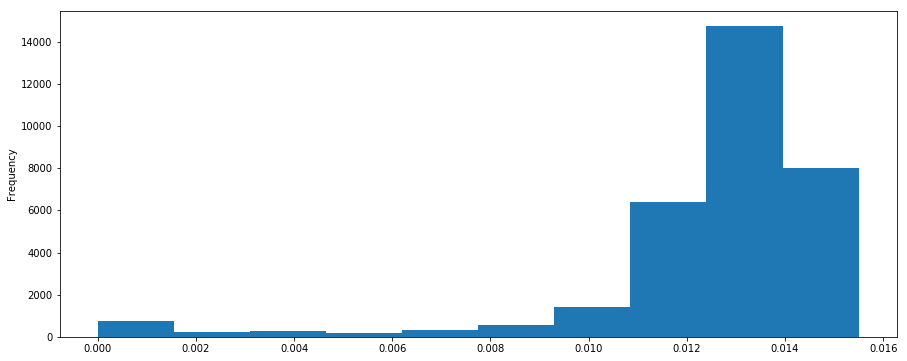

In [686]:
# Histogram based on 'FCOL_LFA' feature
data['FCOL_LFA'].sort_index().plot.hist()

<h2> Here, we an be certain that ouliers will mostly be at the begining of data. After 0.004, there seems to be trend of doubling the freuency than previous values. After 0.014, as there is no doubling step of frequency, that might be an seasonal anomaly. Also, the begining where there seems to be no trend can be seasonal anomaly. 
<p> Because of high spread of values, we can predict that mean might be on the right side of distribution but it will be mostly in middle. There may be a chance of having some stationarity in this series. 

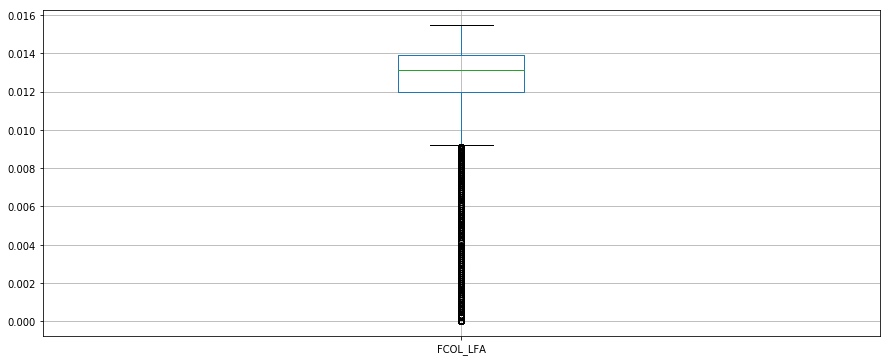

In [687]:
data.boxplot('FCOL_LFA')

<h2> As predicted during area plot and histogram, outliers are at the begining of data values with high quantity. Almost 60 % of values fall between 0.012 to 0.014 and so mean will be somwhere near them. 
<p> All the quartiles are almost same in size which means they may have identical spread which can keep mean at constant. There is probabilty that this series is stationary with upward increasing trend overall. 
<p>Lets see what our feature statistics tell us. 

In [688]:
# First we can see what are mean, median & standard deviation with extra summary for all our columns. 
perc =[.20, .40, .60, .80]
data['FCOL_LFA'].describe(percentiles = perc)

count    32904.000000
mean         0.012419
std          0.002651
min          0.000000
20%          0.011600
40%          0.012700
50%          0.013100
60%          0.013500
80%          0.014100
max          0.015500
Name: FCOL_LFA, dtype: float64

<h2>As predicted our mean is around the values 0.012 to 0.014 where our 60% of distribution lies. 
<p>From 40th percentile to 80th percentile, the difference seems to be simillar which makes mean constant which means our series can be stationary. 
 <p> From begining to 20th percentile and from 80th to last, there seems to be a seasonal anomaly as they are not consistent with the trend. 
  <p>Let's see if the mean and standard deviation changes consistently or not using rolling means and rolling standard deviation

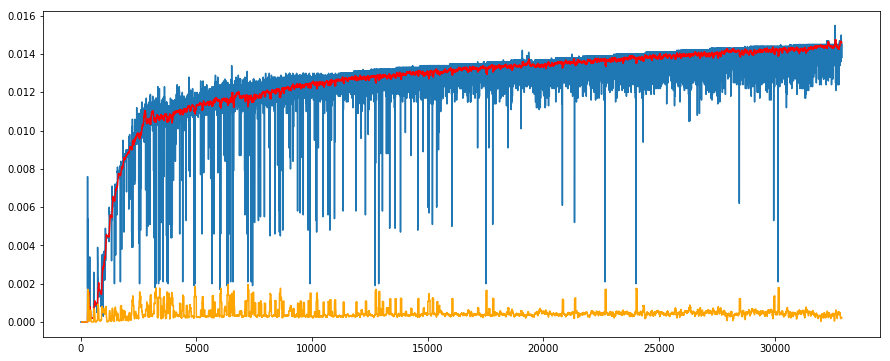

In [689]:
# Here we take mean & standard deviation of every 50 observations continuosly from 'FCOL_LFA' feature and see if it is consistent with data. 

mean_x = data['FCOL_LFA'].rolling(window=50).mean()
std_x = data['FCOL_LFA'].rolling(50).std() 

plt.plot(data['FCOL_LFA'])
plt.plot(mean_x, color = 'red')
plt.plot(std_x, color = 'orange')

<h2>As predicted the mean is almost consistently linear after intial spikes. But the standard deviation has a lot of variation thoughout every 50 observations which means our series may be highly stationary. 
<p>The intial exponential spikes most cetainly can be seasonal anomaly as it differs from whole trend. 
 <p> Let's confirm our result with KPSS test 

In [690]:
#define function for kpss test
from statsmodels.tsa.stattools import kpss
#define KPSS
def kpss_test(timeseries):
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression='c')
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print(kpss_output)


kpss_test(new_data['FCOL_LFA'])

Results of KPSS Test:
Test Statistic           32.116309
p-value                   0.010000
Lags Used                52.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


C:\Users\Manoj Raghorte\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1276: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


<h2>Though it may seem that series is stationary, it is not the case as test statistics is highly varied from critical values. 
Also based on previous observations we can say series has seasonal anomalies at the begining and end of distribution with slightly positive trend and outliers mostly at the begining.  
<p>Let's the relationship between this feature and independent variable

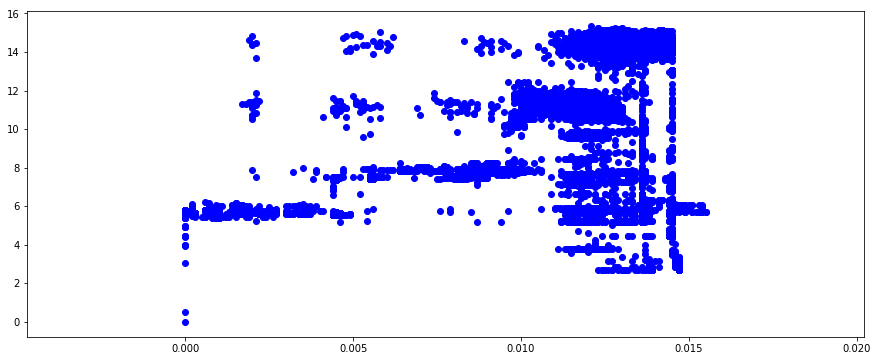

In [691]:
# lets see if there is any relationship between feature 'FCOL_LFA' and independent variable 'POFR2'
plt.scatter(data['FCOL_LFA'],data['POFR'], color='blue')

<h2>This appears to be firstly linear and then exponential relationship. Also proves that much quantity of ouliers are at the begining. Let's first fit linear model to find if there is proper linear relationship. 
<p>Fitting linear model on train data and calculating Rsquared

0.32293875739905786

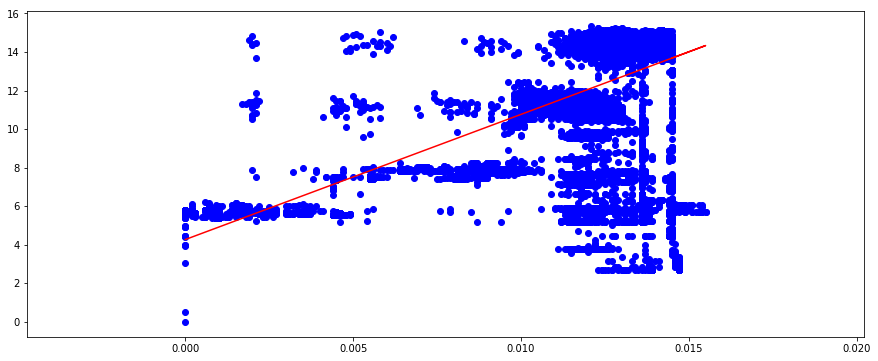

In [693]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
model_1 = LinearRegression()
m = model_1.fit(data[['FCOL_LFA']],data[['POFR']])
plt.scatter(data['FCOL_LFA'],data['POFR'],color='blue')
plt.plot(data['FCOL_LFA'],model_1.predict(data[['FCOL_LFA']]),color = 'red')
model_1.score(data[['FCOL_LFA']],data[['POFR']])

<h2> This is relatively ok linear relationship. 
lets try to fit not linear model. 
<p>Fitting non-linear(polynomial) model on train data and calculating R squared and root mean squared error

2.4062405390397488
0.36937471007824785


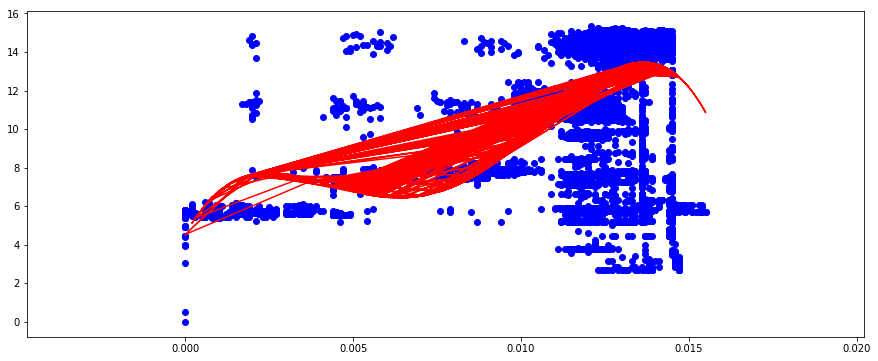

In [697]:
# Non-linear model for degree 4 
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(data[['FCOL_LFA']])
lin_reg = LinearRegression()
lin_reg.fit(X_poly,data[['POFR']])
y_poly_pred = lin_reg.predict(X_poly)

plt.scatter(data['FCOL_LFA'],data['POFR'],color ='blue')
plt.plot(data['FCOL_LFA'], y_poly_pred, color='red')


rmse = np.sqrt(mean_squared_error(data['POFR'],y_poly_pred))
r2 = r2_score(data['POFR'],y_poly_pred)
print(rmse)
print(r2)

<h2>Fitting non-linear(polynomial) model on test data and calculating R squared and root mean squared error

3.2474272184215662
-0.38496892627158186


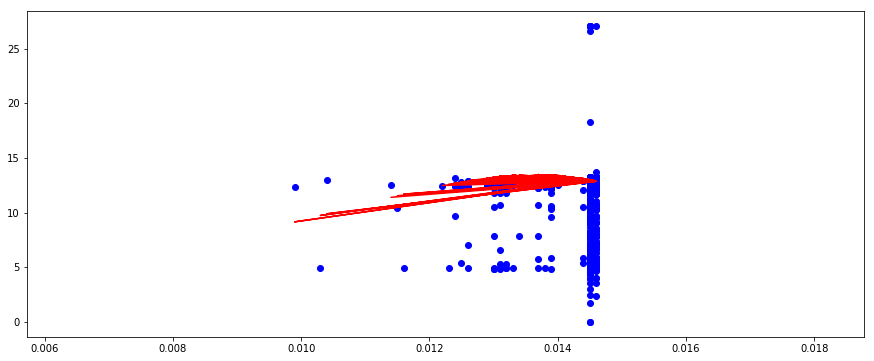

In [698]:
y_poly_pred = lin_reg.predict(poly_reg.fit_transform(data_test[['FCOL_LFA']]))

plt.scatter(data_test['FCOL_LFA'],data_test['POFR2'],color ='blue')
plt.plot(data_test['FCOL_LFA'], y_poly_pred, color='red')


rmse = np.sqrt(mean_squared_error(data_test['POFR2'],y_poly_pred))
r2 = r2_score(data_test['POFR2'],y_poly_pred)
print(rmse)
print(r2)


<h1> <h1> ARIMA 
<p>Non-stationarity anomoly detection

<h3>

Let's check the stationarity of the data which makes sure that the mean, variance and other statistical properties are constant over time. 
If the data is stationary for a long time, it is highly likely that it will follows the same properties if extrapolated. 
Also, if the data is stationary, it is most likely free from the errors due to seasonality or trends in data. 

We have to check if data has constant mean, constant variance over time.

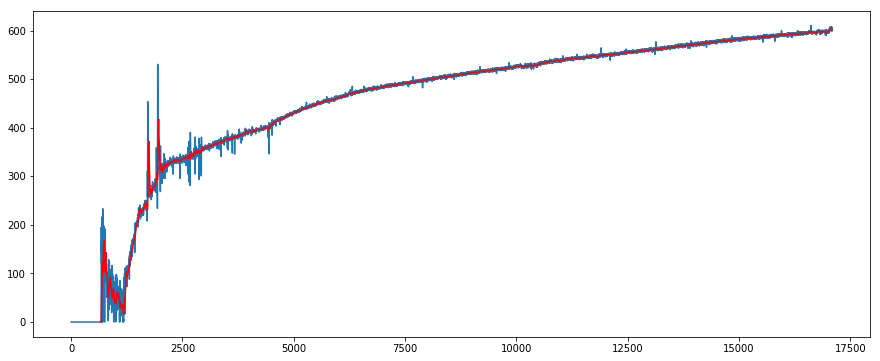

In [438]:
# Here we take mean & standard deviation of every 50 observations continuosly from 'GOR_CGA' feature and see if it is consistent with data. 

mean_x = data['GOR_CGA'].rolling(window=50).mean()
std_x = data['GOR_CGA'].rolling(50).std() 

plt.plot(data['GOR_CGA'])
plt.plot(mean_x, color = 'red')
#plt.plot(std_x, color = 'orange')

<h2> Here we can see that mean is consistent with data overtime and mean grows consistently with data. But we can not be totally certain. Let's see the standard deviation. 

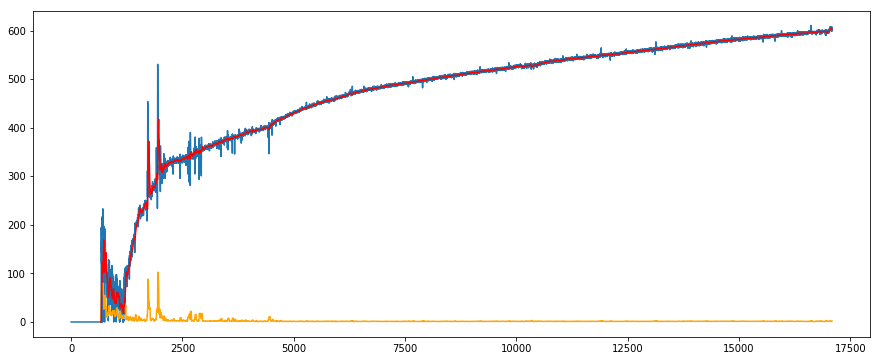

In [439]:
# Plotting standard deviation in yellow with mean and data. 
plt.plot(data['GOR_CGA'])
plt.plot(std_x, color = 'orange')
plt.plot(mean_x, color = 'red')

<h2> Stanadard deviation seems to be constant over time but we can not be certain because we have very large data population and we can not visually tell with certainity if there are peaks or lows or any variation consistent with data. 

Previous techniques of rolling mean and rolling standard deviation are mostly visual. 
Let's work with statistical technique of finding if the data is stationary or not.  
This is done using Dickery fuller test. 

<h2>This is one of the statistical tests for checking stationarity. Here the null hypothesis is that the TS is non-stationary. The test results comprise of a Test Statistic and some Critical Values for difference confidence levels. If the ‘Test Statistic’ is less than the ‘Critical Value’, we can reject the null hypothesis and say that the series is stationary.

In [453]:
data.head()

,GOR_CGA,GOR_LFA,METH_CGA,FCOL_LFA,POFR
Time Stamp,,,,,
0.41,0.0,0.0,0.0,0.0,0.0000
639.41,0.0,0.0,0.0,0.0,0.4984
639.91,0.0,0.0,0.0,0.0,3.0632
640.41,0.0,0.0,0.0,0.0,3.9144
640.91,0.0,0.0,0.0,0.0,3.9653


In [ ]:
    from statsmodels.tsa.stattools import adfuller
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(data['GOR_CGA'], autolag='None')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

<h2>Here the test statistics value is greater than the critical values. so it proves the null hypothesis right which means our series is not stationary. 


In [327]:
ts_log = np.log(data['GOR_CGA'])

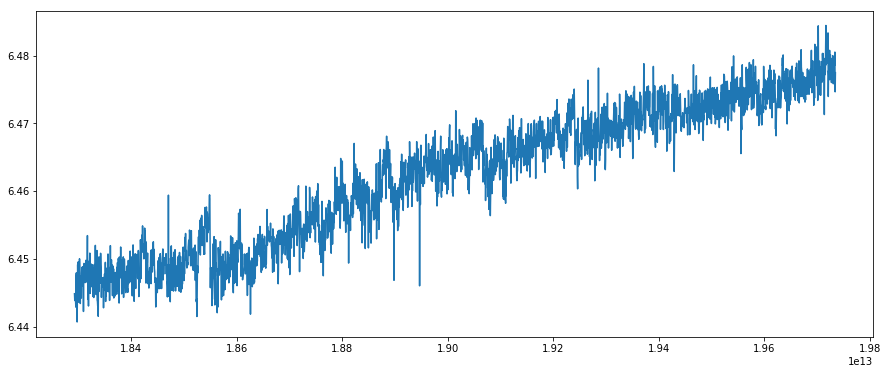

In [328]:
plt.plot(ts_log)

In [329]:
mvg = ts_log.rolling(window=50).mean()

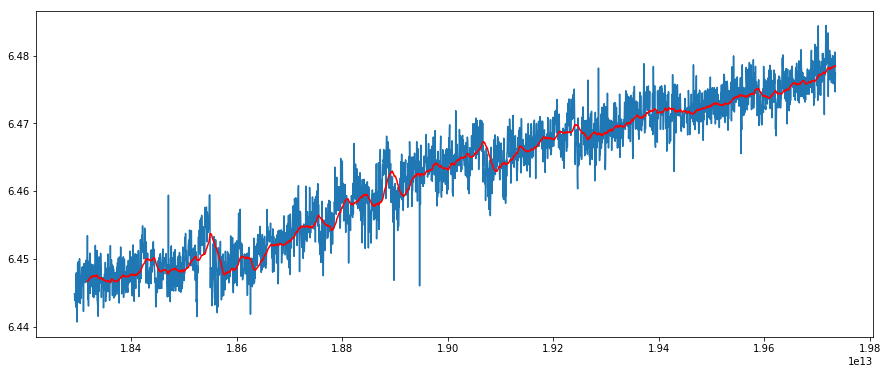

In [330]:
plt.plot(ts_log)
plt.plot(mvg, color='red')

In [331]:
mvg_diff = ts_log - mvg 

In [332]:
mvg_diff.head(50)

Time Stamp
05:04:52.910000         NaN
05:04:53.410000         NaN
05:04:53.910000         NaN
05:04:54.410000         NaN
05:04:54.910000         NaN
05:04:55.410000         NaN
05:04:55.910000         NaN
05:04:56.410000         NaN
05:04:56.910000         NaN
05:04:57.410000         NaN
05:04:57.910000         NaN
05:04:58.410000         NaN
05:04:58.910000         NaN
05:04:59.410000         NaN
05:04:59.910000         NaN
05:05:00.410000         NaN
05:05:00.910000         NaN
05:05:01.410000         NaN
05:05:01.910000         NaN
05:05:02.410000         NaN
05:05:02.910000         NaN
05:05:03.410000         NaN
05:05:03.910000         NaN
05:05:04.410000         NaN
05:05:04.910000         NaN
05:05:05.410000         NaN
05:05:05.910000         NaN
05:05:06.410000         NaN
05:05:06.910000         NaN
05:05:07.410000         NaN
05:05:07.910000         NaN
05:05:08.410000         NaN
05:05:08.910000         NaN
05:05:09.410000         NaN
05:05:09.910000         NaN
05:05:10.

In [333]:
mvg_diff.dropna(inplace= True)


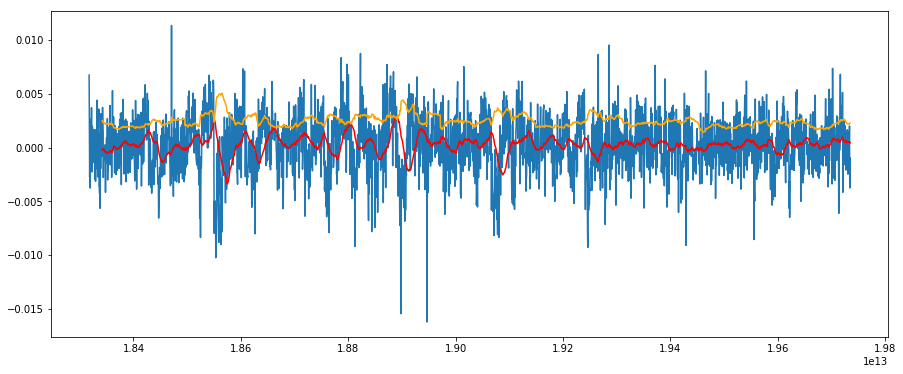

In [334]:
mean_x_avg = mvg_diff.rolling(window=50).mean()
std_x_avg = mvg_diff.rolling(50).std() 

plt.plot(mvg_diff)
plt.plot(mean_x_avg, color = 'red')
plt.plot(std_x_avg, color = 'orange')

In [335]:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(mvg_diff, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                -1.175538e+01
p-value                        1.182097e-21
#Lags Used                     2.700000e+01
Number of Observations Used    2.808000e+03
Critical Value (1%)           -3.432681e+00
Critical Value (5%)           -2.862570e+00
Critical Value (10%)          -2.567318e+00
dtype: float64


<h1> for test set 
<p>Let's find if the feature GOR_LFA follows a stationary trend or not. 

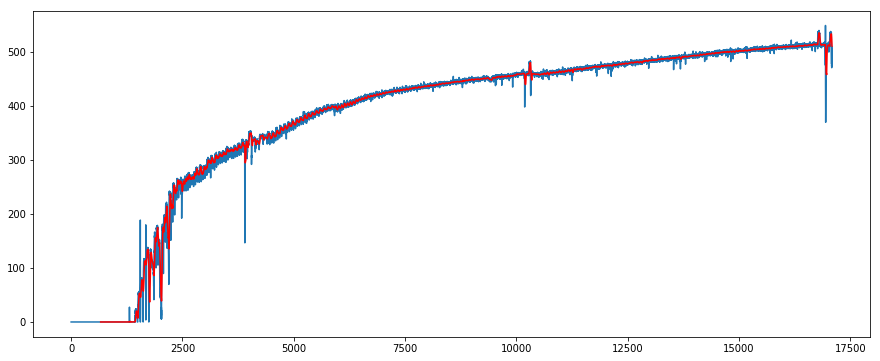

In [441]:

mean_x = data['GOR_LFA'].rolling(window=50).mean()
std_x = data['GOR_LFA'].rolling(50).std() 

plt.plot(data['GOR_LFA'])
plt.plot(mean_x, color = 'red')
#plt.plot(std_x, color = 'orange')

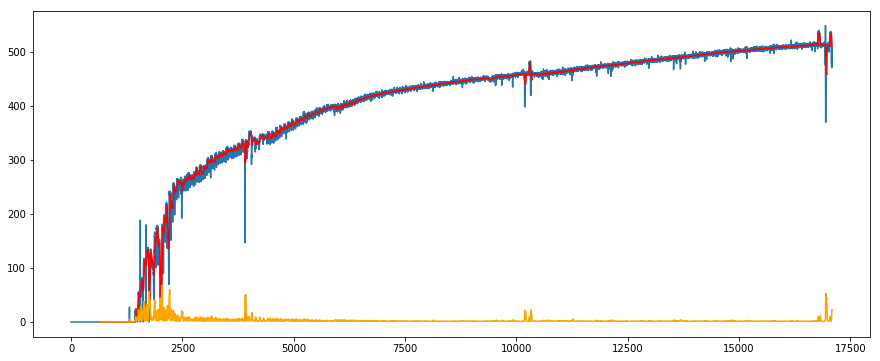

In [442]:
plt.plot(data['GOR_LFA'])
plt.plot(mean_x, color = 'red')
plt.plot(std_x, color = 'orange')

In [171]:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(data['GOR_LFA'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                   -2.284637
p-value                           0.176971
#Lags Used                       20.000000
Number of Observations Used    2864.000000
Critical Value (1%)              -3.432635
Critical Value (5%)              -2.862550
Critical Value (10%)             -2.567307
dtype: float64



<h2>For GOR_LFA feature, based on rolling mean, rolling statistics and Dickey-fuller test, the series appears to be non-stationary. But, the test statistics and most critical value percentages are not very varied which means time series is near to be stationary.  

<h1>Let's find if the feature METH_CGA follows a stationary trend or not. 

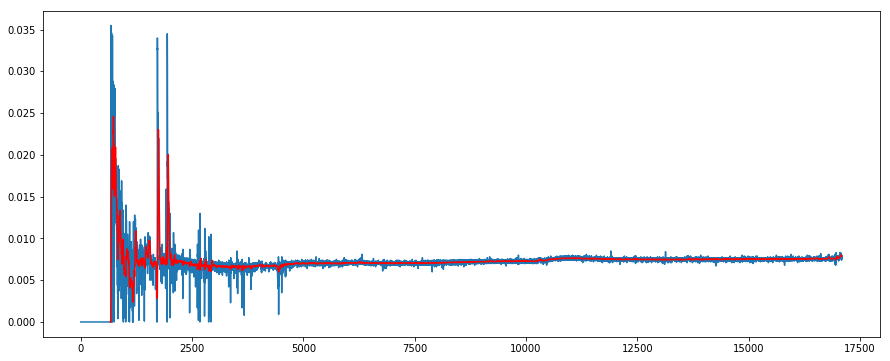

In [443]:

mean_x = data['METH_CGA'].rolling(window=50).mean()
std_x = data['METH_CGA'].rolling(50).std() 

plt.plot(data['METH_CGA'])
plt.plot(mean_x, color = 'red')
#plt.plot(std_x, color = 'orange')

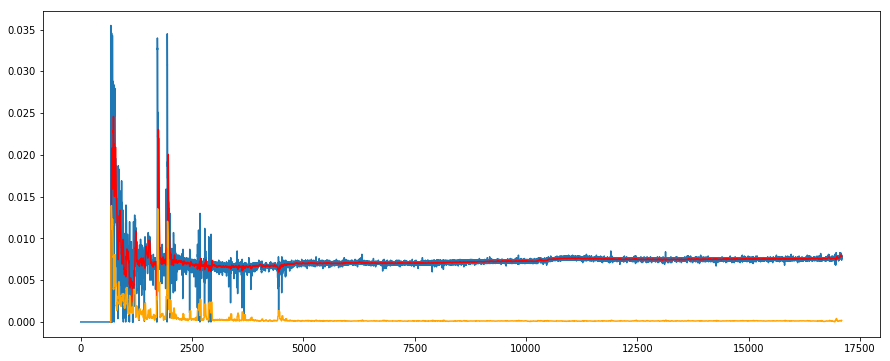

In [444]:
plt.plot(data['METH_CGA'])
plt.plot(mean_x, color = 'red')
plt.plot(std_x, color = 'orange')

In [174]:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(data['METH_CGA'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                   -3.547726
p-value                           0.006843
#Lags Used                       11.000000
Number of Observations Used    2873.000000
Critical Value (1%)              -3.432628
Critical Value (5%)              -2.862547
Critical Value (10%)             -2.567306
dtype: float64


<h2>For METH_CGA feature, based on rolling mean, rolling statistics and Dickey-fuller test, the series appears to be stationary. because test statistics is lesser than the most critical values which means we can say with 10% confidence that our series is stationary.   

<h1>Let's find if the feature FCOL_LFA follows a stationary trend or not. 

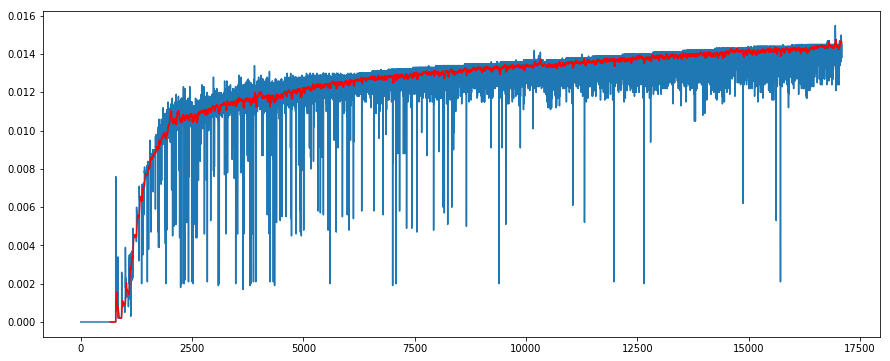

In [445]:

mean_x = data['FCOL_LFA'].rolling(window=50).mean()
std_x = data['FCOL_LFA'].rolling(50).std() 

plt.plot(data['FCOL_LFA'])
plt.plot(mean_x, color = 'red')
#plt.plot(std_x, color = 'orange')

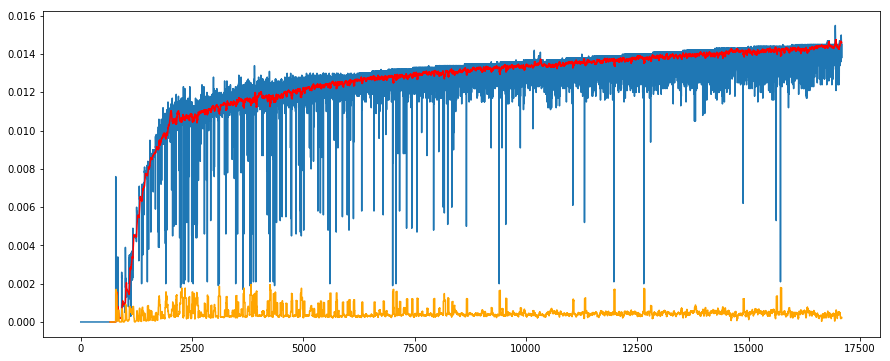

In [446]:
plt.plot(data['FCOL_LFA'])
plt.plot(mean_x, color = 'red')
plt.plot(std_x, color = 'orange')

In [177]:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(data['FCOL_LFA'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                  -20.713550
p-value                           0.000000
#Lags Used                        5.000000
Number of Observations Used    2879.000000
Critical Value (1%)              -3.432623
Critical Value (5%)              -2.862544
Critical Value (10%)             -2.567305
dtype: float64


<h2>For FCOL_LFA, our series can be considered very stationary as the test statistics is way smaller than the critical values. 

In [77]:
data = pd.read_csv('core.csv')
data['Time Stamp'] = data['Time Stamp'].astype(str)+ 's'
data['Time Stamp'] = pd.to_timedelta(data['Time Stamp'])
data.index = pd.to_datetime(data['Time Stamp'])


In [79]:
data.drop(['Time Stamp'],axis=1,inplace=True)
data.dropna()
data.head()

,GOR_CGA,GOR_LFA,METH_CGA,FCOL_LFA,POFR2
Time Stamp,,,,,
1970-01-01 05:04:52.910,629.4653,516.1825,0.0098,0.0145,0.0000
1970-01-01 05:04:53.410,628.8616,516.1315,0.0097,0.0145,1.7496
1970-01-01 05:04:53.910,629.2354,516.5745,0.0097,0.0145,2.4481
1970-01-01 05:04:54.410,628.8007,517.2440,0.0096,0.0145,3.0072
1970-01-01 05:04:54.910,628.9004,517.0315,0.0097,0.0146,3.5374


<h1> Regression -
lets first find out the relationship between dependent & independent variables   

In [640]:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(new_data['GOR_CGA'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                    -4.435195
p-value                            0.000257
#Lags Used                        52.000000
Number of Observations Used    32851.000000
Critical Value (1%)               -3.430549
Critical Value (5%)               -2.861628
Critical Value (10%)              -2.566817
dtype: float64
